In [1]:
'''
【课程2.2】  异常值处理

异常值是指样本中的个别值，其数值明显偏离其余的观测值。
异常值也称离群点，异常值的分析也称为离群点的分析

异常值分析 → 3σ原则 / 箱型图分析
异常值处理方法 → 删除 / 修正填补

'''

'\n【课程2.2】  异常值处理\n\n异常值是指样本中的个别值，其数值明显偏离其余的观测值。\n异常值也称离群点，异常值的分析也称为离群点的分析\n\n异常值分析 → 3σ原则 / 箱型图分析\n异常值处理方法 → 删除 / 修正填补\n\n'

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats
%matplotlib inline

均值为：1.033，标准差为：100.021
异常值共26条


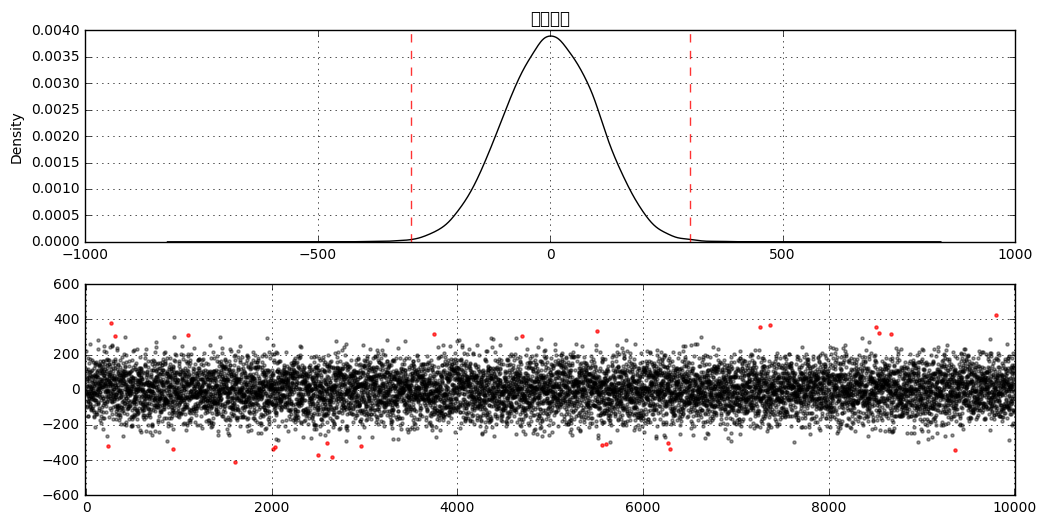

In [25]:
# 异常值分析
# （1）3σ原则：如果数据服从正态分布，异常值被定义为一组测定值中与平均值的偏差超过3倍的值 → p(|x - μ| > 3σ) ≤ 0.003


s = pd.Series(np.random.randn(10000)*100)
st = s.describe()
mean = s.mean()
std = s.std()
stats.kstest(s,'norm',(mean,std))  # 正态性检验  若算出来的p大于0.5，则就是正太分布
print('均值为：%.3f，标准差为：%.3f' % (mean,std))
# 正态性检验

fig = plt.figure(figsize = (12,6))
ax1 = fig.add_subplot(2,1,1)
s.plot(kind = 'kde',grid = True,style = '-k',title = '密度曲线')
plt.axvline(3*std,hold=None,color='r',linestyle="--",alpha=0.8) 
plt.axvline(-3*std,hold=None,color='r',linestyle="--",alpha=0.8) 
# 绘制数据密度曲线

ax2 = fig.add_subplot(2,1,2)
error = s[np.abs(s - mean) > 3*std]  #abs指的是绝对值
s_c = s[np.abs(s - mean) <= 3*std]
print('异常值共%i条' % len(error))
# 筛选出异常值error、剔除异常值之后的数据s_c


plt.scatter(s_c.index,s_c,color = 'black',marker = '.',alpha = 0.4)
plt.scatter(error.index,error,color = 'r',marker='.',alpha = 0.7)
plt.xlim([-10,10010])
plt.grid()

分位差为：133.895,下限为：-269.009,上限为：266.571


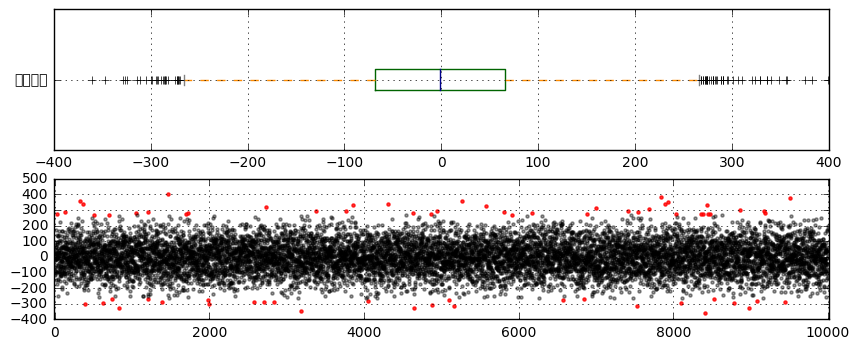

In [34]:
# 异常值分析
# （2）箱型图分析

s = pd.Series(np.random.randn(10000)*100)
fig = plt.figure(figsize = (10,4))
ax1 = fig.add_subplot(2,1,1)
color = dict(boxes='DarkGreen', whiskers='DarkOrange', medians='DarkBlue', caps='Gray')
s.plot.box(vert=False, grid = True,color = color,ax = ax1,label = '样本数据')

st = s.describe()
q1 = st['25%']
q3 = st['75%']
iqr = q3 -q1
mi = q1 - 1.5*iqr
ma = q3 + 1.5*iqr
print('分位差为：%.3f,下限为：%.3f,上限为：%.3f'%(iqr,mi,ma))

ax2 = fig.add_subplot(2,1,2)
error = s[(s<mi)|(s>ma)]
s_c = s[(s>=mi)&(s<=ma)]
plt.scatter(error.index,error,color = 'r',marker='.',alpha = 0.8)
plt.scatter(s_c.index,s_c,color = 'black',alpha = 0.4,marker = '.')
plt.xlim([-10,10010])
plt.grid()
# 图表表达